In [1]:
from tensorflow.keras import layers
from tensorflow import keras
import tensorflow as tf
from sklearn.model_selection import train_test_split


from ast import literal_eval
import pandas as pd
import numpy as np

In [3]:
arxiv_data = pd.read_csv('arxiv_data_210930-054931.csv', on_bad_lines='skip')


In [4]:
arxiv_data.head()

,terms,titles,abstracts
0,['cs.LG'],Multi-Level Attention Pooling for Graph Neural...,Graph neural networks (GNNs) have been widely ...
1,"['cs.LG', 'cs.AI']",Decision Forests vs. Deep Networks: Conceptual...,Deep networks and decision forests (such as ra...
2,"['cs.LG', 'cs.CR', 'stat.ML']",Power up! Robust Graph Convolutional Network v...,Graph convolutional networks (GCNs) are powerf...
3,"['cs.LG', 'cs.CR']",Releasing Graph Neural Networks with Different...,With the increasing popularity of Graph Neural...
4,['cs.LG'],Recurrence-Aware Long-Term Cognitive Network f...,Machine learning solutions for pattern classif...


In [5]:
arxiv_data.shape


(56181, 3)

In [6]:
label_column = arxiv_data['terms'].apply(literal_eval)
label = label_column.explode().unique()
label

array(['cs.LG', 'cs.AI', 'cs.CR', ...,
       'D.1.3; G.4; I.2.8; I.2.11; I.5.3; J.3',
       '68T07, 68T45, 68T10, 68T50, 68U35', 'I.2.0; G.3'], dtype=object)

In [7]:
arxiv_data = arxiv_data[~arxiv_data['titles'].duplicated()]
arxiv_data

,terms,titles,abstracts
0,['cs.LG'],Multi-Level Attention Pooling for Graph Neural...,Graph neural networks (GNNs) have been widely ...
1,"['cs.LG', 'cs.AI']",Decision Forests vs. Deep Networks: Conceptual...,Deep networks and decision forests (such as ra...
2,"['cs.LG', 'cs.CR', 'stat.ML']",Power up! Robust Graph Convolutional Network v...,Graph convolutional networks (GCNs) are powerf...
3,"['cs.LG', 'cs.CR']",Releasing Graph Neural Networks with Different...,With the increasing popularity of Graph Neural...
4,['cs.LG'],Recurrence-Aware Long-Term Cognitive Network f...,Machine learning solutions for pattern classif...
...,...,...,...
56173,['stat.ML'],An experimental study of graph-based semi-supe...,The volume of data generated by internet and s...
56175,"['stat.ML', 'cs.LG']",Bayesian Differential Privacy through Posterio...,Differential privacy formalises privacy-preser...
56176,"['cs.CV', 'cs.IR']",Mining Spatio-temporal Data on Industrializati...,Despite the growing availability of big data i...
56177,"['cs.LG', 'cs.AI', 'cs.CL', 'I.2.6; I.2.7']",Wav2Letter: an End-to-End ConvNet-based Speech...,This paper presents a simple end-to-end model ...


In [8]:
print(sum(arxiv_data['terms'].value_counts()==1))
print(arxiv_data['terms'].nunique())


2503
3401


In [9]:
arxiv_data_filtered = arxiv_data.groupby('terms').filter(lambda x: len(x) >1)
arxiv_data_filtered.shape

(38602, 3)

In [10]:
arxiv_data_filtered['terms'] = arxiv_data_filtered['terms'].apply(lambda x: literal_eval(x))
arxiv_data_filtered['terms'].values[:3]

array([list(['cs.LG']), list(['cs.LG', 'cs.AI']),
       list(['cs.LG', 'cs.CR', 'stat.ML'])], dtype=object)

tts

In [11]:
train_df, test_df = train_test_split(arxiv_data_filtered,test_size = 0.1,stratify=arxiv_data_filtered['terms'].values,)

In [12]:
train_df.shape, test_df.shape

((34741, 3), (3861, 3))

In [13]:
val_df = test_df.sample(frac = 0.5)
test_df.drop(val_df.index, inplace=True)

In [14]:
terms = tf.ragged.constant(train_df['terms'].values)
lookup = tf.keras.layers.StringLookup(output_mode='multi_hot')
lookup.adapt(terms)

vocab = lookup.get_vocabulary()

print("Vocabulary:\n")
print(vocab)

Vocabulary:

['[UNK]', 'cs.CV', 'cs.LG', 'stat.ML', 'cs.AI', 'eess.IV', 'cs.RO', 'cs.CL', 'cs.NE', 'cs.GR', 'cs.CR', 'math.OC', 'eess.SP', 'cs.SI', 'cs.MM', 'cs.SY', 'cs.IR', 'eess.SY', 'cs.MA', 'cs.HC', 'math.IT', 'cs.IT', 'cs.DC', 'stat.AP', 'cs.CY', 'stat.ME', 'stat.TH', 'math.ST', 'eess.AS', 'cs.SD', 'cs.DS', 'q-bio.QM', 'q-bio.NC', 'stat.CO', 'cs.CG', 'cs.GT', 'cs.NI', 'math.NA', 'cs.SE', 'cs.NA', 'I.2.6', 'physics.chem-ph', 'cs.DB', 'physics.comp-ph', 'cs.LO', 'cond-mat.dis-nn', 'q-bio.BM', 'math.PR', 'cs.PL', '68T45', 'cs.AR', 'physics.data-an', 'quant-ph', 'I.2.10', 'cs.CE', 'cond-mat.stat-mech', 'q-fin.ST', 'physics.ao-ph', 'I.4.6', 'math.DS', 'cs.CC', '68T05', 'physics.soc-ph', 'physics.med-ph', 'cs.PF', 'econ.EM', 'cs.DM', 'I.4.8', 'q-bio.GN', 'astro-ph.IM', 'physics.flu-dyn', 'math.AT', 'hep-ex', 'cs.FL', 'I.4', '68U10', 'q-fin.TR', 'physics.geo-ph', 'I.5.4', 'I.2', 'cond-mat.mtrl-sci', 'I.4.9', '68T10', 'physics.optics', 'I.4; I.5', '68T07', 'q-fin.CP', 'math.CO', 'math.AP

In [15]:


sample_label = train_df["terms"].iloc[1]
print(sample_label)
label_binarized = lookup([sample_label])
print(f"Label-binarized representation: {label_binarized}")



['stat.ML']
Label-binarized representation: [[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [16]:
max_seqlen = 150
batch_size = 128
padding_token = "<pad>"
auto = tf.data.AUTOTUNE

def make_dataset(dataframe, is_train=True):
    labels = tf.ragged.constant(dataframe["terms"].values)
    label_binarized = lookup(labels).numpy()
    dataset = tf.data.Dataset.from_tensor_slices((dataframe["abstracts"].values, label_binarized))
    dataset = dataset.shuffle(batch_size * 10) if is_train else dataset
    return dataset.batch(batch_size)


In [17]:
train_dataset = make_dataset(train_df, is_train=True)
validation_dataset = make_dataset(val_df, is_train=False)
test_dataset = make_dataset(test_df, is_train=False)

In [18]:
def invert_multi_hot(encoded_label):
  hot_indices = np.argwhere(encoded_labels==1.0)[...,0]
  return np.take(vocab, hot_indices)

text_batch, label_batch = next(iter(train_dataset))
for i, text in enumerate(text_batch[:5]):
    label = label_batch[i].numpy()[None, ...]
    print(text)
    print(invert_multi_hot)

tf.Tensor(b'The channel redundancy in feature maps of convolutional neural networks\n(CNNs) results in the large consumption of memories and computational\nresources. In this work, we design a novel Slim Convolution (SlimConv) module\nto boost the performance of CNNs by reducing channel redundancies. Our SlimConv\nconsists of three main steps: Reconstruct, Transform and Fuse, through which\nthe features are splitted and reorganized in a more efficient way, such that\nthe learned weights can be compressed effectively. In particular, the core of\nour model is a weight flipping operation which can largely improve the feature\ndiversities, contributing to the performance crucially. Our SlimConv is a\nplug-and-play architectural unit which can be used to replace convolutional\nlayers in CNNs directly. We validate the effectiveness of SlimConv by\nconducting comprehensive experiments on ImageNet, MS COCO2014, Pascal VOC2012\nsegmentation, and Pascal VOC2007 detection datasets. The experiment

In [19]:
vocabulary = set()
train_df['abstracts'].str.lower().str.split().apply(vocabulary.update)
vocab_size = len(vocabulary)

# text vectorization

In [20]:
text_vectorizer = layers.TextVectorization(max_tokens=vocab_size,ngrams=2,output_mode="tf_idf")

text_vectorizer.adapt(train_dataset.map(lambda text, label: text))

In [21]:
train_dataset = train_dataset.map(lambda text, label: (text_vectorizer(text), label), num_parallel_calls=auto).prefetch(auto)
validation_dataset = validation_dataset.map(lambda text, label: (text_vectorizer(text), label), num_parallel_calls=auto).prefetch(auto)
test_dataset = test_dataset.map(lambda text, label: (text_vectorizer(text), label), num_parallel_calls=auto).prefetch(auto)

# Model Training

In [24]:
from tensorflow.keras.callbacks import EarlyStopping

model1 = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dropout(0.5),

    layers.Dense(256, activation="relu"),
    layers.Dropout(0.5),

    layers.Dense(lookup.vocabulary_size(), activation='sigmoid')
])

model1.compile(loss="binary_crossentropy", optimizer='adam', metrics=['binary_accuracy'])
es = EarlyStopping(patience=5,restore_best_weights=True)

history = model1.fit(train_dataset,validation_data=validation_dataset,epochs=20,callbacks=[es],verbose=1)

Epoch 1/20
272/272 ━━━━━━━━━━━━━━━━━━━━ 410s 1s/step - binary_accuracy: 0.9477 - loss: 0.1218 - val_binary_accuracy: 0.9946 - val_loss: 0.0190
Epoch 2/20
272/272 ━━━━━━━━━━━━━━━━━━━━ 227s 824ms/step - binary_accuracy: 0.9947 - loss: 0.0191 - val_binary_accuracy: 0.9946 - val_loss: 0.0192
Epoch 3/20
272/272 ━━━━━━━━━━━━━━━━━━━━ 238s 870ms/step - binary_accuracy: 0.9957 - loss: 0.0143 - val_binary_accuracy: 0.9946 - val_loss: 0.0186
Epoch 4/20
272/272 ━━━━━━━━━━━━━━━━━━━━ 239s 857ms/step - binary_accuracy: 0.9965 - loss: 0.0115 - val_binary_accuracy: 0.9946 - val_loss: 0.0192
Epoch 5/20
272/272 ━━━━━━━━━━━━━━━━━━━━ 242s 883ms/step - binary_accuracy: 0.9971 - loss: 0.0099 - val_binary_accuracy: 0.9945 - val_loss: 0.0198
Epoch 6/20
272/272 ━━━━━━━━━━━━━━━━━━━━ 282s 1s/step - binary_accuracy: 0.9974 - loss: 0.0087 - val_binary_accuracy: 0.9945 - val_loss: 0.0202
Epoch 7/20
272/272 ━━━━━━━━━━━━━━━━━━━━ 334s 1s/step - binary_accuracy: 0.9977 - loss: 0.0078 - val_binary_accuracy: 0.9946 - val_

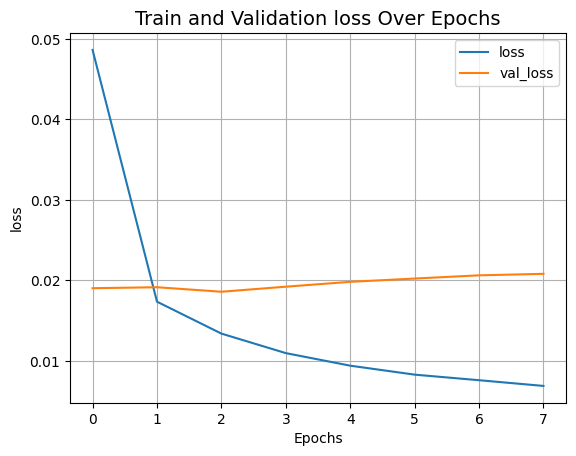

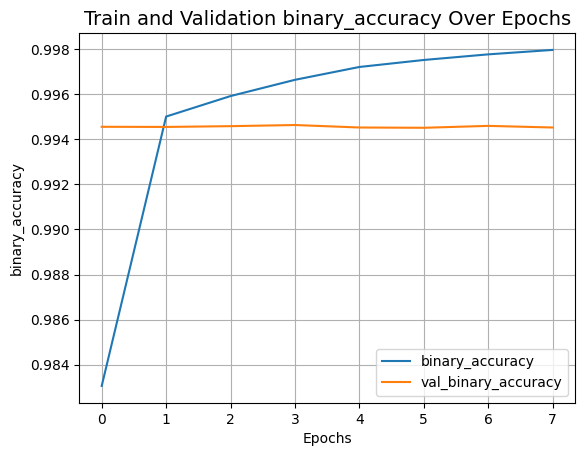

In [25]:
import matplotlib.pyplot as plt

def plot_result(item):
    plt.plot(history.history[item], label=item)
    plt.plot(history.history["val_" + item], label="val_" + item)
    plt.xlabel("Epochs")
    plt.ylabel(item)
    plt.title("Train and Validation {} Over Epochs".format(item), fontsize=14)
    plt.legend()
    plt.grid()
    plt.show()

plot_result("loss")
plot_result("binary_accuracy")

In [35]:
# model evaltuation on test and val dataset
_, binary_acc1 = model1.evaluate(test_dataset)
_, binary_acc2 = model1.evaluate(validation_dataset)

print(f"Categorical accuracy on the test set: {round(binary_acc1 * 100, 2)}%.")
print(f"Categorical accuracy on the validation set: {round(binary_acc2 * 100, 2)}%.")

16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 172ms/step - binary_accuracy: 0.9945 - loss: 0.0180
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 146ms/step - binary_accuracy: 0.9945 - loss: 0.0188
Categorical accuracy on the test set: 99.44%.
Categorical accuracy on the validation set: 99.46%.


In [26]:
import pickle
model1.save("models/model.h5")

saved_text_vectorizer_config = text_vectorizer.get_config()
with open("models/text_vectorizer_config.pkl", "wb") as f:
    pickle.dump(saved_text_vectorizer_config, f)

with open("models/vocab.pkl", "wb") as f:
    pickle.dump(vocab, f)

In [31]:
import pickle

# Load the model
loaded_model = keras.models.load_model("models/model.h5")

from tensorflow.keras.layers import TextVectorization

with open("models/text_vectorizer_config.pkl", "rb") as f:
    saved_text_vectorizer_config = pickle.load(f)

loaded_text_vectorizer = text_vectorizer.from_config(saved_text_vectorizer_config)

# with open("models/text_vectorizer_weights.pkl", "rb") as f:
#     weights = pickle.load(f)
#     loaded_text_vectorizer.set_weights(weights)

with open("models/vocab.pkl", "rb") as f:
    loaded_vocab = pickle.load(f)

# Model prediction

In [32]:
def invert_multi_hot(encoded_hot):
  hot_indices = np.argwhere(encoded_hot==1.0)[...,0]
  return np.take(loaded_vocab, hot_indices)

loaded_text_vectorizer.adapt(train_df["abstracts"].values)

def predict_category(abstract, model, vectorizer, label_lookup):
    preprocessed_abstract = vectorizer([abstract])

    predictions = model.predict(preprocessed_abstract)
    predicted_labels = label_lookup(np.round(predictions).astype(int)[0])

    return predicted_labels

In [33]:
new_abstract = 'Deep networks and decision forests (such as random forests and gradient\nboosted trees) are the leading machine learning methods for structured and\ntabular data, respectively. Many papers have empirically compared large numbers\nof classifiers on one or two different domains (e.g., on 100 different tabular\ndata settings). However, a careful conceptual and empirical comparison of these\ntwo strategies using the most contemporary best practices has yet to be\nperformed. Conceptually, we illustrate that both can be profitably viewed as\n"partition and vote" schemes. Specifically, the representation space that they\nboth learn is a partitioning of feature space into a union of convex polytopes.\nFor inference, each decides on the basis of votes from the activated nodes.\nThis formulation allows for a unified basic understanding of the relationship\nbetween these methods. Empirically, we compare these two strategies on hundreds\nof tabular data settings, as well as several vision and auditory settings. Our\nfocus is on datasets with at most 10,000 samples, which represent a large\nfraction of scientific and biomedical datasets. In general, we found forests to\nexcel at tabular and structured data (vision and audition) with small sample\nsizes, whereas deep nets performed better on structured data with larger sample\nsizes. This suggests that further gains in both scenarios may be realized via\nfurther combining aspects of forests and networks. We will continue revising\nthis technical report in the coming months with updated results.'
predicted_categories = predict_category(new_abstract, loaded_model, loaded_text_vectorizer, invert_multi_hot)
print("Predicted Categories:", predicted_categories)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted Categories: ['cs.LG' 'cs.AI']


In [34]:
new_abstract = "Graph neural networks (GNNs) have been widely used to learn vector\nrepresentation of graph-structured data and achieved better task performance\nthan conventional methods. The foundation of GNNs is the message passing\nprocedure, which propagates the information in a node to its neighbors. Since\nthis procedure proceeds one step per layer, the range of the information\npropagation among nodes is small in the lower layers, and it expands toward the\nhigher layers. Therefore, a GNN model has to be deep enough to capture global\nstructural information in a graph. On the other hand, it is known that deep GNN\nmodels suffer from performance degradation because they lose nodes' local\ninformation, which would be essential for good model performance, through many\nmessage passing steps. In this study, we propose multi-level attention pooling\n(MLAP) for graph-level classification tasks, which can adapt to both local and\nglobal structural information in a graph. It has an attention pooling layer for\neach message passing step and computes the final graph representation by\nunifying the layer-wise graph representations. The MLAP architecture allows\nmodels to utilize the structural information of graphs with multiple levels of\nlocalities because it preserves layer-wise information before losing them due\nto oversmoothing. Results of our experiments show that the MLAP architecture\nimproves the graph classification performance compared to the baseline\narchitectures. In addition, analyses on the layer-wise graph representations\nsuggest that aggregating information from multiple levels of localities indeed\nhas the potential to improve the discriminability of learned graph\nrepresentations."
predicted_categories = predict_category(new_abstract, loaded_model, loaded_text_vectorizer, invert_multi_hot)
print("Predicted Categories:", predicted_categories)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
Predicted Categories: ['cs.LG']
